# Pre entrega n°1 - Matias Nahuel Montenegro
## Analisis de ventas de autos


## ABSTRACT

### Resumen:
#### Este analisis se basara en el dataset "Car Sales Report" disponible en Kaggle https://www.kaggle.com/datasets/missionjee/car-sales-report
#### En el mismo se tendran en cuenta variables diversas tales como:
- Genero del comprador
- Marca de auto
- Tipo de motor
- Transmision
- Color del auto

 ###  Hipótesis de interés:
#### Basándonos en un análisis previo del dataset, planteamos las siguientes hipótesis:
- Los hombres tienen una mayor preferencia por los autos con transmisión manual en comparación con las mujeres
- Los autos tipo SUV son los más populares en comparación con otros tipos de vehículos
- Los autos con precios más bajos tienen un mayor volumen de ventas en comparación con los autos de lujo.

  ### Objetivos:
- Probar las hipótesis planteadas mediante análisis estadísticos y visualizaciones.
- Identificar patrones y tendencias en los datos.


### Impacto:
#### Los resultados de este estudio permitirán:
- Comprender las Preferencias de los Consumidores por Género
- Identificar las Tendencias del Mercado por Tipo de Vehículo
- Optimizar Estrategias de Precios y Ofertas
- Mejorar la Segmentación del Mercado

In [3]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [4]:
df = pd.read_csv("Car Sales.csv")
df.head(5)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [5]:
df.shape

(23906, 16)

In [6]:
df = df.drop(columns="Phone")
df = df.drop(columns="Dealer_Name")
df.head(5)



,Car_id,Date,Customer Name,Gender,Annual Income,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,Janesville


In [7]:
df.describe().round(2)

,Annual Income,Price ($)
count,23906.00,23906.00
mean,830840.29,28090.25
std,720006.40,14788.69
min,10080.00,1200.00
25%,386000.00,18001.00
50%,735000.00,23000.00
75%,1175750.00,34000.00
max,11200000.00,85800.00


### De la resolucion anterior podemos afirmar que:

-La media de ingresos anuales es de $83.0840 dolares

-El ingreso mas bajo es de $10.080 dolares

-El ingreso mas alto es de $11.200.000 dolares

In [9]:
df_sex = df[['Gender']].groupby(by=['Gender']).size().reset_index(name='Sex')      
print(df_sex)


   Gender    Sex
0  Female   5108
1    Male  18798


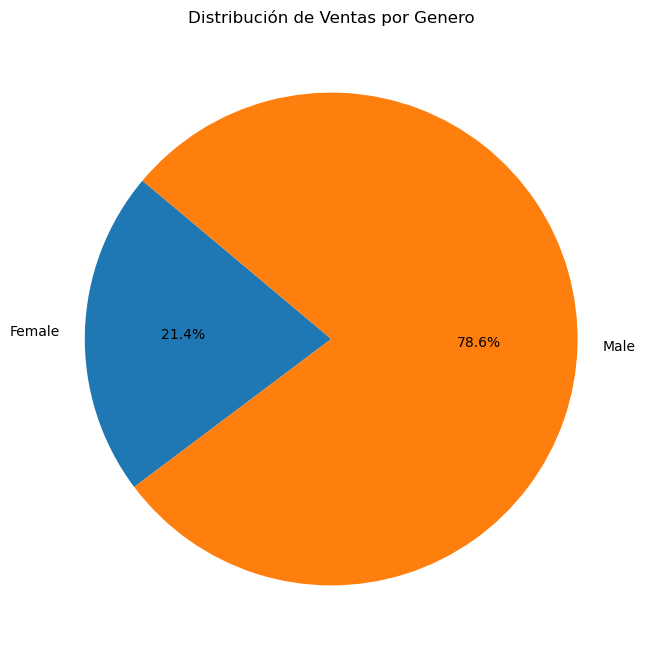

In [10]:
plt.figure(figsize=(8, 8))
plt.pie(df_sex['Sex'],labels=df_sex['Gender'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Ventas por Genero')
plt.show()

### Ventas por genero
#### -Sabiendo que el 78.6% de las ventas corresponden a un hombre, ahora queremos saber si la eleccion de la transmision tiene  incidencia en el genero

In [12]:
df_transmission = df[['Gender','Transmission']].groupby(by=['Gender','Transmission']).size().reset_index(name='Cantidad')      
print(df_transmission)

   Gender Transmission  Cantidad
0  Female         Auto      2699
1  Female       Manual      2409
2    Male         Auto      9872
3    Male       Manual      8926


### En los dos casos podemos ver que hay una preferencia por la caja automatica, incluso en los hombres la brecha es mas grande.

<Axes: xlabel='Gender', ylabel='Cantidad'>

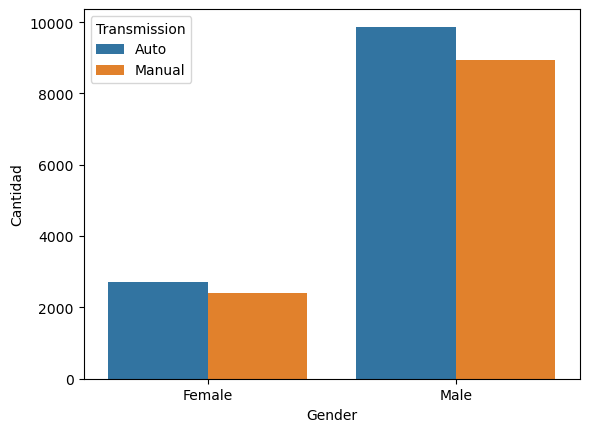

In [14]:
sns.barplot(x='Gender',y='Cantidad',hue='Transmission',data=df_transmission)

In [15]:
df_body_style = df[['Body Style']].groupby(by=['Body Style']).size().reset_index(name='Cantidad')      
df_body_style

,Body Style,Cantidad
0,Hardtop,2971
1,Hatchback,6128
2,Passenger,3945
3,SUV,6374
4,Sedan,4488


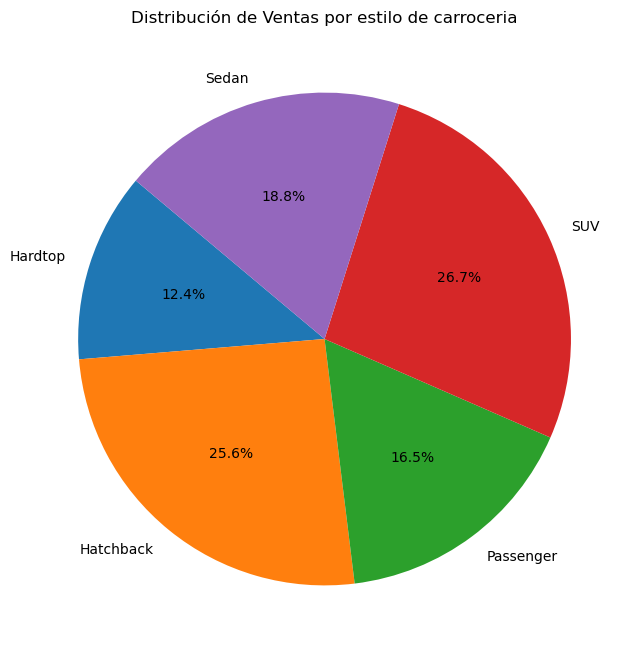

In [16]:
plt.figure(figsize=(8, 8))
plt.pie(df_body_style['Cantidad'],labels=df_body_style['Body Style'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Ventas por estilo de carroceria')
plt.show()

### El tipo de carroceria mas elegido es el SUV
### El menos elegido es el Hardtop

In [18]:
df_mas_vendidos= df[['Price ($)']].groupby(by=['Price ($)']).size().reset_index(name='Cantidad')      
df_mas_vendidos

,Price ($),Cantidad
0,1200,1
1,1450,1
2,1700,1
3,2200,1
4,4200,1
...,...,...
865,85400,1
866,85500,2
867,85600,2
868,85601,1


In [19]:
df_mas_vendidos.describe().round(2)

,Price ($),Cantidad
count,870.00,870.00
mean,32851.88,27.48
std,18509.43,97.60
min,1200.00,1.00
25%,18500.25,1.00
50%,27275.50,2.00
75%,43600.75,6.00
max,85800.00,1191.00


## Ventas
#### El valor media de compra es de $32851

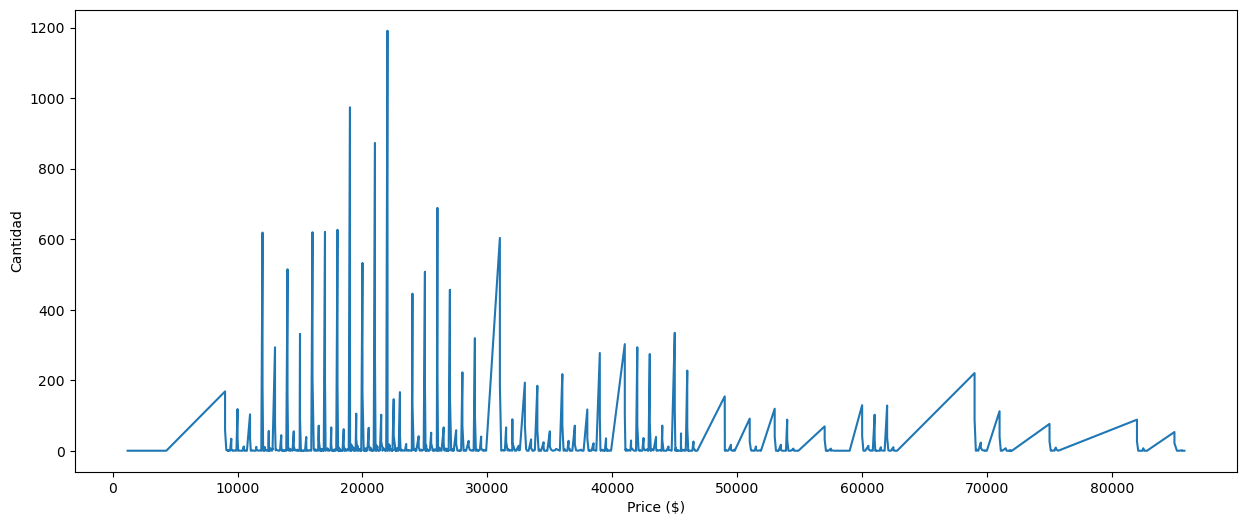

In [21]:
plt.figure(figsize=(15,6)) 
sns.lineplot(x='Price ($)',y='Cantidad',data=df_mas_vendidos)
plt.xticks(ticks=range(0, int(df_mas_vendidos['Price ($)'].max()) + 1, 10000))
plt.show()

### Podemos observar que el mayor volumen de compra esta comprendido en los autos que valen entre 12.000 a 30.000 dolares

## Resultados de las observaciones

### Eleccion de la transmision:
#### En ambos casos, es evidente que existe una marcada preferencia por los vehículos con caja automática. Esta tendencia se manifiesta de manera clara tanto en hombres como en mujeres, pero es aún más pronunciada entre los hombres. A pesar de lo que podría ser una creencia común, los datos no muestran una inclinación de los hombres hacia la caja manual en comparación con las mujeres. De hecho, la diferencia en la preferencia por la caja automática es considerablemente mayor entre los hombres, lo que refuerza la idea de que, en general, la transmisión automática es la opción más favorecida entre todos los grupos, independientemente del género. Esto sugiere que la percepción tradicional de que los hombres prefieren la caja manual no se sostiene frente a los datos actuales, que indican una preferencia generalizada por la comodidad y conveniencia que ofrece la transmisión automática.

### Eleccion del tipo de carroceria:
#### El tipo de carrocería más popular y preferido por los compradores es el SUV. Este vehículo destaca por su versatilidad, espacio y capacidad para adaptarse a diversas necesidades, lo que lo convierte en la elección principal entre los consumidores. Por otro lado, el tipo de carrocería menos elegido es el Hardtop. A pesar de sus características únicas, el Hardtop no logra captar la misma atención ni interés que otros tipos de carrocería, posicionándose como la opción menos popular entre los compradores. Esta disparidad en las preferencias subraya la tendencia actual del mercado, donde los SUV dominan debido a su practicidad y popularidad, mientras que otros estilos, como el Hardtop, quedan rezagados en términos de demanda.

### Valor de compra
#### Podemos notar que el mayor volumen de compras se concentra en los automóviles cuyo precio se encuentra en el rango de entre 12,000 y 30,000 dólares. Este intervalo de precios parece ser el más atractivo para los consumidores, ya que representa una categoría que equilibra accesibilidad y valor. Los vehículos dentro de este rango de precios probablemente ofrecen una combinación favorable de características, calidad y costo, lo que los hace especialmente atractivos para un amplio espectro de compradores. En consecuencia, los autos que se encuentran dentro de este rango de precios disfrutan de una mayor demanda en comparación con los vehículos de precios más bajos o más altos, lo que indica que los consumidores prefieren opciones que proporcionen una buena relación entre el costo y los beneficios que ofrecen.